## plot ACC & NMAE from persistence and DPLE for medium Eo species (E0=0.4 eV) within 4 groups of LMEs

In [1]:
import xarray as xr
import numpy as np
import tools_corrstats
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec
from matplotlib import rc
import os

In [2]:
USER = os.environ['USER']
path = f'/glade/scratch/{USER}/DPLE-results'
var = 'Phi'

### select layer

In [3]:
layer = '0-600m'
#layer = '0-200m'
#layer = '200-600m'

### read skills for medium-Eo species

In [4]:
filename = f'{path}/DPLE_LME_box01-11_ACC_NMAE_{var}_Eo_space_{layer}_leadyear_1-10.nc'
ds = xr.open_dataset(filename)
# select medium Eo = 0.4 eV
corr_p = ds['corr_p'].isel(nphi=6).values # 11,10
rcri_p = ds['rcri_p'].isel(nphi=6).values # 11,10
corr_d = ds['corr_d'].isel(nphi=6).values # 11,10
rcri_d = ds['rcri_d'].isel(nphi=6).values # 11,10
corr13 = ds['corr13'].isel(nphi=6).values # 11,10
rcri13 = ds['rcri13'].isel(nphi=6).values # 11,10
nmae_p = ds['nmae_p'].isel(nphi=6).values # 11,10
nmae_d = ds['nmae_d'].isel(nphi=6).values # 11,10
ds.close()

### significance tests

In [5]:
corr = corr_d - corr_p
nmae = nmae_p - nmae_d

In [6]:
# test significance
lenn = 2007+1-1954
t_cr, p_cr = tools_corrstats.dependent_corr(corr_p,corr_d,corr13,lenn-1,twotailed=False,method='steiger')

In [7]:
alpha = 0.05
smask = p_cr <= alpha
pmask = corr_p > rcri_p
dmask = corr_d > rcri_d
maskp = corr > 0.

### plot parameters

In [8]:
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]
newbox = list(zip(boxnb, range(len(boxnb))))
nnbox = [newbox[0]]+[newbox[10]]+[newbox[9]]+newbox[1:6]+[newbox[8]]+[newbox[7]]+[newbox[6]]
cols = ['gold','orangered','orangered','dodgerblue','gold','dodgerblue','orangered','dodgerblue','gold','orangered','dodgerblue']
yy = np.arange(1,11) # lead year 1-10
#
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [9]:
boxloc = np.ones([len(boxnb),2])
boxloc[0,0],boxloc[10,0],boxloc[1,0],boxloc[6,0],boxloc[7,0],boxloc[8,0] = np.arange(0.06,0.96,0.15)
boxloc[0,1],boxloc[10,1],boxloc[1,1],boxloc[6,1],boxloc[7,1],boxloc[8,1] = 0.8*np.ones(6)
boxloc[9,0] = 0.23
boxloc[9,1] = 0.45
boxloc[2,0],boxloc[3,0],boxloc[4,0],boxloc[5,0] = np.arange(0.27,0.84,0.15)
boxloc[2,1],boxloc[3,1],boxloc[4,1],boxloc[5,1] = 0.08*np.ones(4)

1 0
65 10
10 9
2 1
3 2
4 3
5 4
6 5
9 8
8 7
7 6


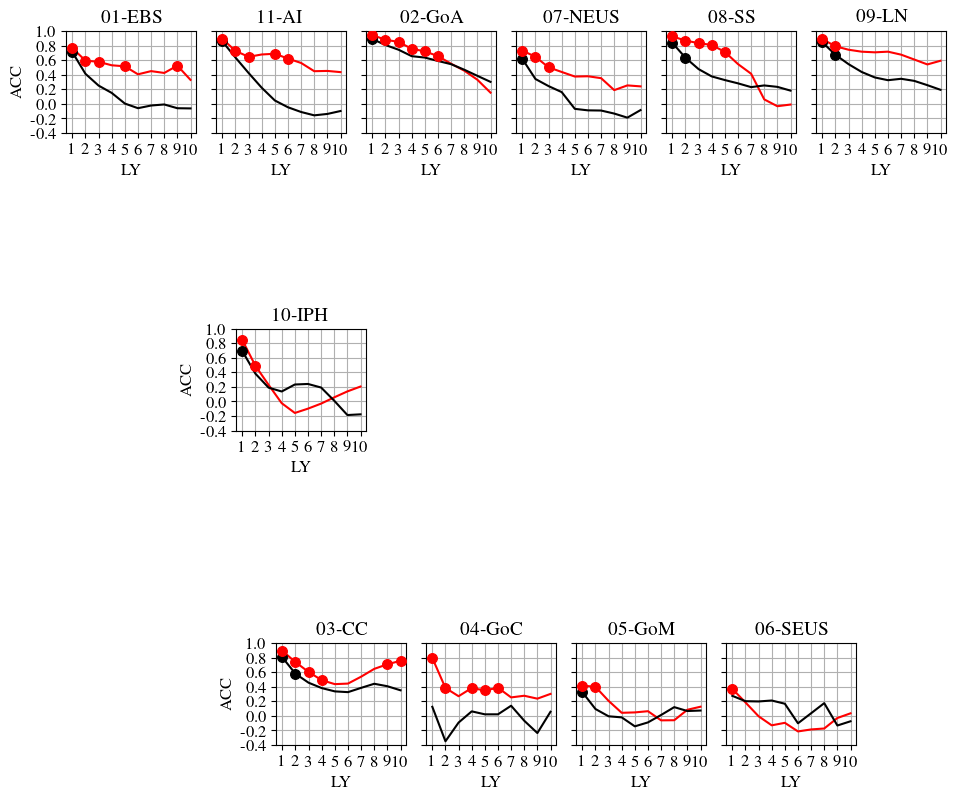

In [10]:
fig = plt.figure(figsize=[10, 8.5])
#
for box, jj in nnbox:
            print(box,jj)

            ax0 = fig.add_axes([boxloc[jj,0],boxloc[jj,1], 0.13, 0.12])
            # DPLE
            ax0.plot(yy, corr_d[jj], color='r', lw=1.5, label=boxna[jj])
            yy1 = np.ma.array(yy, mask=~dmask[jj])
            aa1 = np.ma.array(corr_d[jj], mask=~dmask[jj])
            ax0.scatter(yy1, aa1, s=50, marker='o', color='r', lw=.8, zorder=11)
            # persistence
            ax0.plot(yy, corr_p[jj], color='k', lw=1.5)
            yy1 = np.ma.array(yy, mask=~pmask[jj])
            aa1 = np.ma.array(corr_p[jj], mask=~pmask[jj])
            ax0.scatter(yy1, aa1, s=50, marker='o', color='k', lw=.8, zorder=10)
            #
            ax0.grid(linestyle='solid')
            ax0.set_xticks(yy)
            ax0.set_xticklabels([str(ii) for ii in yy],fontsize=12)
            ax0.set_xlabel('LY', fontsize=12, fontweight='bold')
            ax0.set_yticks(np.array(range(-6,11,2))/10.)
            if box in [1,10,3]:
                ax0.set_yticklabels([str(ii/10.) for ii in range(-6,11,2)],fontsize=12)
                ax0.set_ylabel('ACC', fontsize=12, fontweight='bold')
            else:
                ax0.set_yticklabels([])
            ax0.set_ylim(-0.4,1.0)
            ax0.set_title(boxna[jj],fontsize=14)
#
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/Figure1_LME_box01-11_Pers_DPLE_ACC_lineplot_medium_Eo_{layer}.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()